In [14]:
import matplotlib.pyplot as plt
import heapq
from pprint import pprint
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import networkx as nx
from hypergraphx import Hypergraph
from hypergraphx.viz.draw_hypergraph import draw_hypergraph
import sys
sys.path.append('..')
 
from theoretical_calculation_higher import calculation_higher
from theoretical_calculation_pairwise import calculation_pairwise

### Figure 6c

Hypergraph with 57 nodes and 108 edges.
Distribution of hyperedge sizes: {13: 2, 2: 99, 3: 7}
{'average_hyperdegree': 4.3,
 'average_order': 2.27,
 'num_of_hyperedges': 108,
 'num_of_nodes': 57,
 'r_gic': 1.0622,
 'r_gmc': 0.8133,
 'r_hdb': 0.869,
 'r_him': 0.9736,
 'r_hpc': 1.0622}


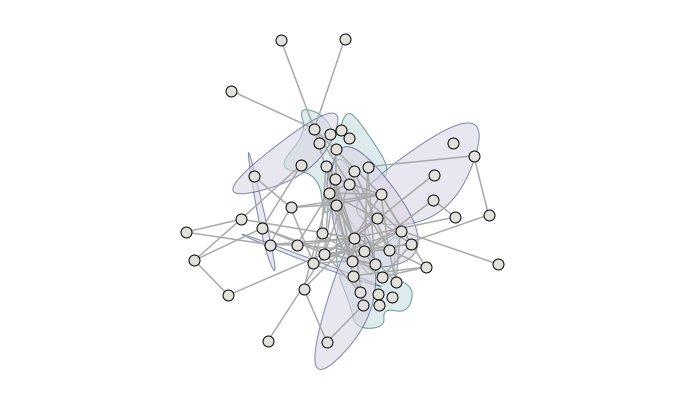

In [7]:
hyperdata = "congress-bills"

file_hyperedge = open(f'../cleaned_datasets/{hyperdata}-hyperedges.txt')
hyperedge = file_hyperedge.readlines()
hyperedge_lst = []
for edge in hyperedge:
        edge = edge.strip('\n').split(",")
        hyperedge_lst.append([int(n) for n in edge])

H = Hypergraph(hyperedge_lst)           # hypergraph construction
print(H)

theoretical_solution = calculation_higher(H)
pprint(theoretical_solution)

SIZE_TWO_COLOR = 'darkgrey'
SIZE_THREE_COLOR = '#DAD6E3'
SIZE_THIRTEEN_COLOR = '#C9DEE2'

hye_facecolor = {SIZE_TWO_COLOR: 'darkgrey', SIZE_THREE_COLOR: '#324274', SIZE_THIRTEEN_COLOR: '#18605A'}

hyperedge_color_by_order = {2: SIZE_THREE_COLOR, 12: SIZE_THIRTEEN_COLOR}
hyeperedge_facecolor_by_order = {2: hye_facecolor[SIZE_THREE_COLOR], 12: hye_facecolor[SIZE_THIRTEEN_COLOR]}

draw_hypergraph(H, hyperedge_alpha=0.6, edge_width=1.5, edge_color=SIZE_TWO_COLOR, hyperedge_color_by_order=hyperedge_color_by_order, 
    hyperedge_facecolor_by_order=hyeperedge_facecolor_by_order, node_size=120,
     node_color='#E2E0DD', node_facecolor='black', node_shape='o', with_node_labels=False)
plt.savefig('figure_6c.jpg', bbox_inches = 'tight',dpi=800)

### Figure 6d

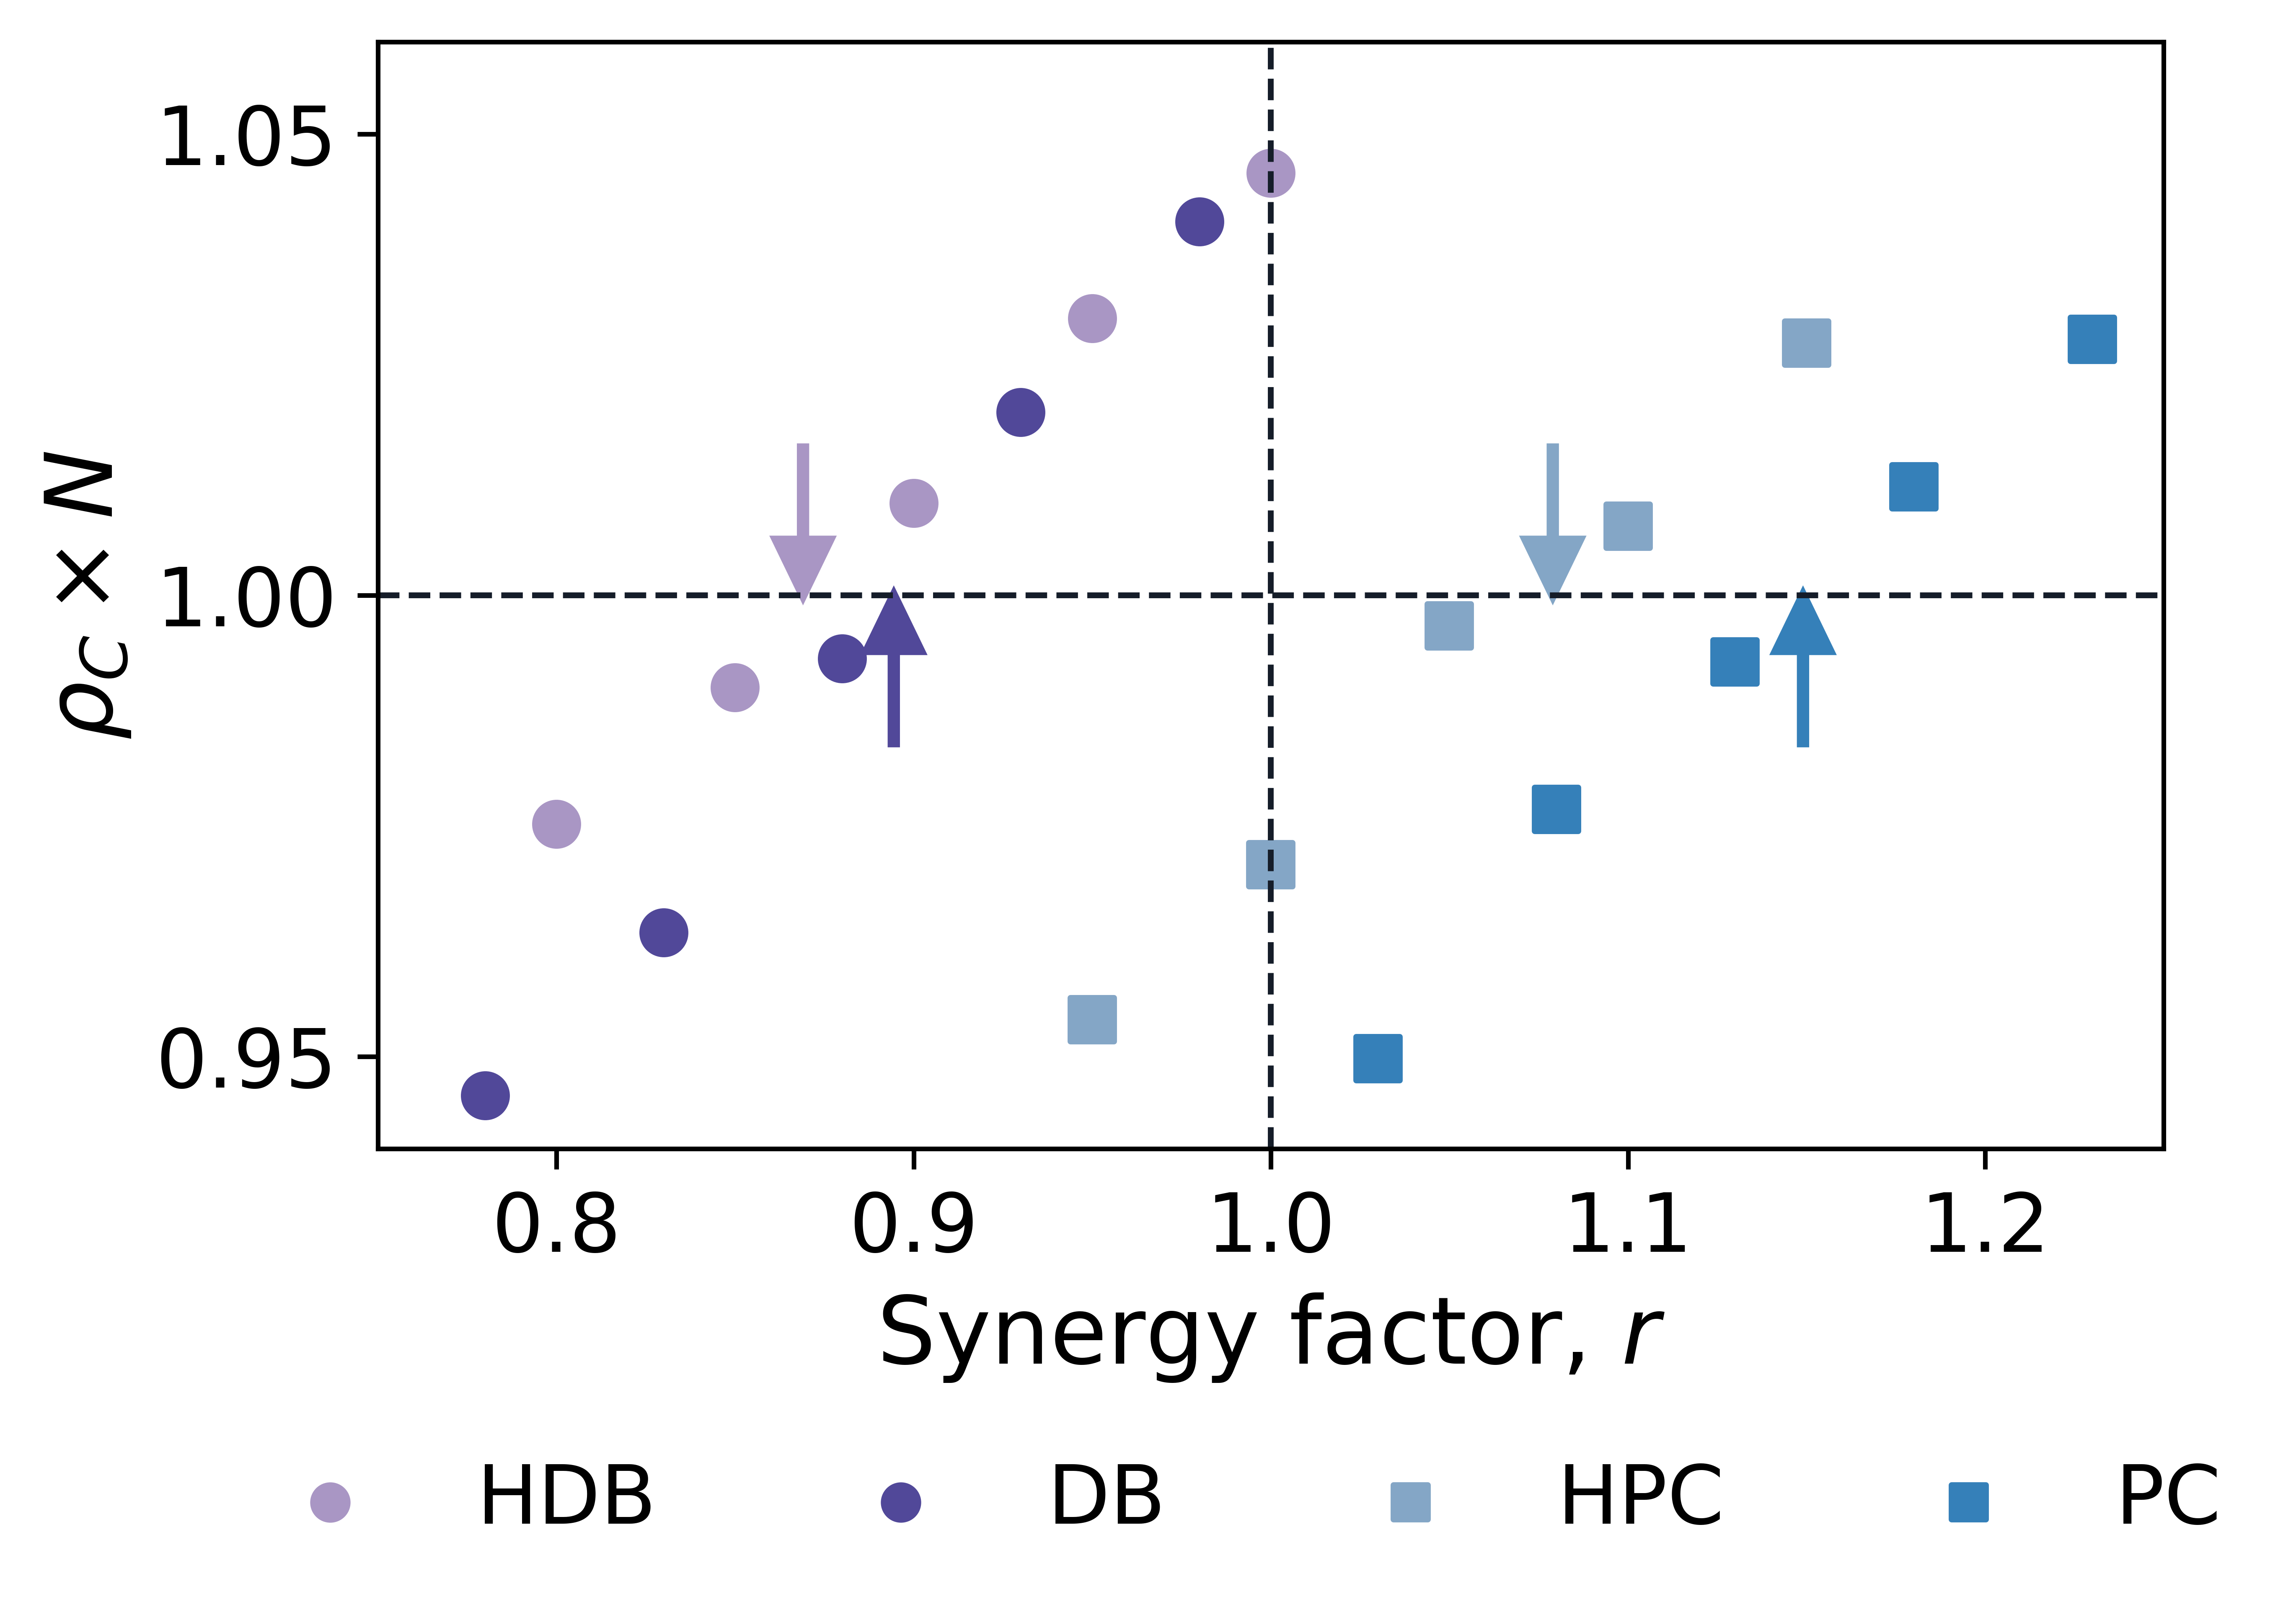

In [3]:
fig = plt.figure(dpi=1000, figsize=(5.5,3.5))
gs = gridspec.GridSpec(1, 1, figure=fig)
ax0 = plt.subplot(gs[0, 0])

r_hdb = [0.8, 0.85, 0.9, 0.95, 1]
success_hdb = [0.97523, 0.99, 1.01, 1.03, 1.0458]
ax0.scatter(r_hdb, success_hdb, c = '#A996C4', marker="o", s=55, label='HDB')
ax0.arrow(0.8690469554838842, 1.016, 0, -0.016,linewidth=1.5,color='#A996C4',
            linestyle='-',head_length=0.006,head_width=0.015, length_includes_head=True)

r_db = [0.78, 0.83, 0.88, 0.93, 0.98]
success_db = [0.94578, 0.963466, 0.99315, 1.01984, 1.04052]
ax0.scatter(r_db, success_db, c = '#514899', marker="o", s=55, label='DB')
ax0.arrow(0.8944584764568165, 0.984, 0, 0.016,linewidth=1.5,color='#514899',
            linestyle='-',head_length=0.006,head_width=0.015, length_includes_head=True)

r_hpc = [0.95, 1, 1.05, 1.1, 1.15]
success_hpc = [0.954, 0.9708, 0.99667, 1.0075, 1.02734]
ax0.scatter(r_hpc, success_hpc, c = '#84A6C6', marker="s", s=55, label='HPC')
ax0.arrow(1.07895659, 1.016, 0, -0.016,linewidth=1.5,color='#84A6C6',
            linestyle='-',head_length=0.006,head_width=0.015, length_includes_head=True)

r_pc = [1.03, 1.08, 1.13, 1.18, 1.23] 
success_pc = [0.9498, 0.9768, 0.99278, 1.01176, 1.0277446]
ax0.scatter(r_pc, success_pc, c = '#3580B9', marker="s", s=55, label='PC')
ax0.arrow(1.1490142666, 0.984, 0, 0.016,linewidth=1.5,color='#3580B9',
            linestyle='-',head_length=0.006,head_width=0.015, length_includes_head=True)


ax0.axhline(y=1, ls='--', c='#151D29', linewidth =1)
ax0.axvline(x=1, ls='--', c='#151D29', linewidth =1)

ax0.set_xlim(0.75, 1.25)
ax0.set_ylim(0.94, 1.06)
ax0.set_yticks([0.95, 1.0, 1.05])

ax0.tick_params(labelsize = 14)

ax0.set_xlabel(r"Synergy factor, $r$",fontsize=16)
ax0.set_ylabel(r"$\rho_{C} \times N$",fontsize=16)

ax0.legend(fontsize=14, markerscale=0.8, frameon=False, ncol=4, loc='lower center', bbox_to_anchor=(0.48, -0.42))

mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False

fig.savefig('figure_6d.jpg', bbox_inches = 'tight', dpi=1000)

### Figure 6e

#### Generate all the connected graphs of size 7 and transform these to hypergraphs

In [2]:
G_all_graph = nx.graph_atlas_g()
G_all_graph.pop(0)

## all the connected graphs of size 7
G_graph_7 = [g for g in G_all_graph if (nx.is_connected(g) and g.number_of_nodes() == 7)]  

## transform graphs to hypergraphs by extracting the maximum cliques as the hyperedges
H_hypergraph_7 = [Hypergraph(list(nx.algorithms.clique.find_cliques(g))) for g in G_graph_7]     

#### Compute the thoeretical $r^*$ of both graphs and hypergraphs

In [10]:
r_hdb = [calculation_higher(hg)['r_hdb'] for hg in H_hypergraph_7]      # theoretical critical values under HDB mechanism
r_hpc = [calculation_higher(hg)['r_hpc'] for hg in H_hypergraph_7]      # theoretical critical values under HPC mechanism

r_db = [calculation_pairwise(hg)['r_db'] for hg in H_hypergraph_7]      # theoretical critical values under DB mechanism
r_pc = [calculation_pairwise(hg)['r_pc'] for hg in H_hypergraph_7]      # theoretical critical values under PC mechanism

r_hdb[-1] = r_db[-1]
r_hpc[-1] = r_pc[-1]

/Users/wangdini/Desktop/Evolutionary game on hypergraph/upload/Higher-orderStrategyUpdate/figures_and_table/../theoretical_calculation_pairwise.py:132: RuntimeWarning: divide by zero encountered in double_scalars
  r_db = (np.sum((Pi_proj_mat @ Transition_mat @ Transition_mat) * Coatime_mat)) / (np.sum((Pi_proj_mat @ Transition_mat \
/Users/wangdini/Desktop/Evolutionary game on hypergraph/upload/Higher-orderStrategyUpdate/figures_and_table/../theoretical_calculation_pairwise.py:137: RuntimeWarning: divide by zero encountered in double_scalars
  r_pc = (np.sum((Pi_proj_mat @ Transition_mat) * Coatime_mat)) / (np.sum((Pi_proj_mat @ Transition_mat @ Payoff_mat) \


#### Sort the graphs by $r^*_G$

In [11]:
def find_all_occurrences(lst, item):
    
    indices = [idx for idx in range(len(lst)) if lst[idx] == item]
    return indices

In [12]:
## sort the graphs according to the critical values of DB mechanism
r_db_sorted = sorted(r_db)
r_hdb_sorted = []
r_db_sorted_norep = sorted(list(set(r_db)))
for r in r_db_sorted_norep:
    for idx in find_all_occurrences(r_db, r):
        r_hdb_sorted.append(r_hdb[idx])

## sort the graphs according to the critical values of PC mechanism
r_pc_sorted = sorted(r_pc)
r_hpc_sorted = []
r_pc_sorted_norep = sorted(list(set(r_pc)))
for r in r_pc_sorted_norep:
    for idx in find_all_occurrences(r_pc, r):
        r_hpc_sorted.append(r_hpc[idx])

#### Comparison between higher-order and pairwise updates (figure 6e)

/var/folders/6q/mx2zbw5x5kvcqxf56q_s30500000gn/T/ipykernel_80127/549910991.py:12: RuntimeWarning: invalid value encountered in double_scalars
  vs = [a / b for a, b in zip(r_hdb_sorted, r_db_sorted)]
/var/folders/6q/mx2zbw5x5kvcqxf56q_s30500000gn/T/ipykernel_80127/549910991.py:31: RuntimeWarning: invalid value encountered in double_scalars
  vs = [a / b for a, b in zip(r_hpc_sorted, r_pc_sorted)]


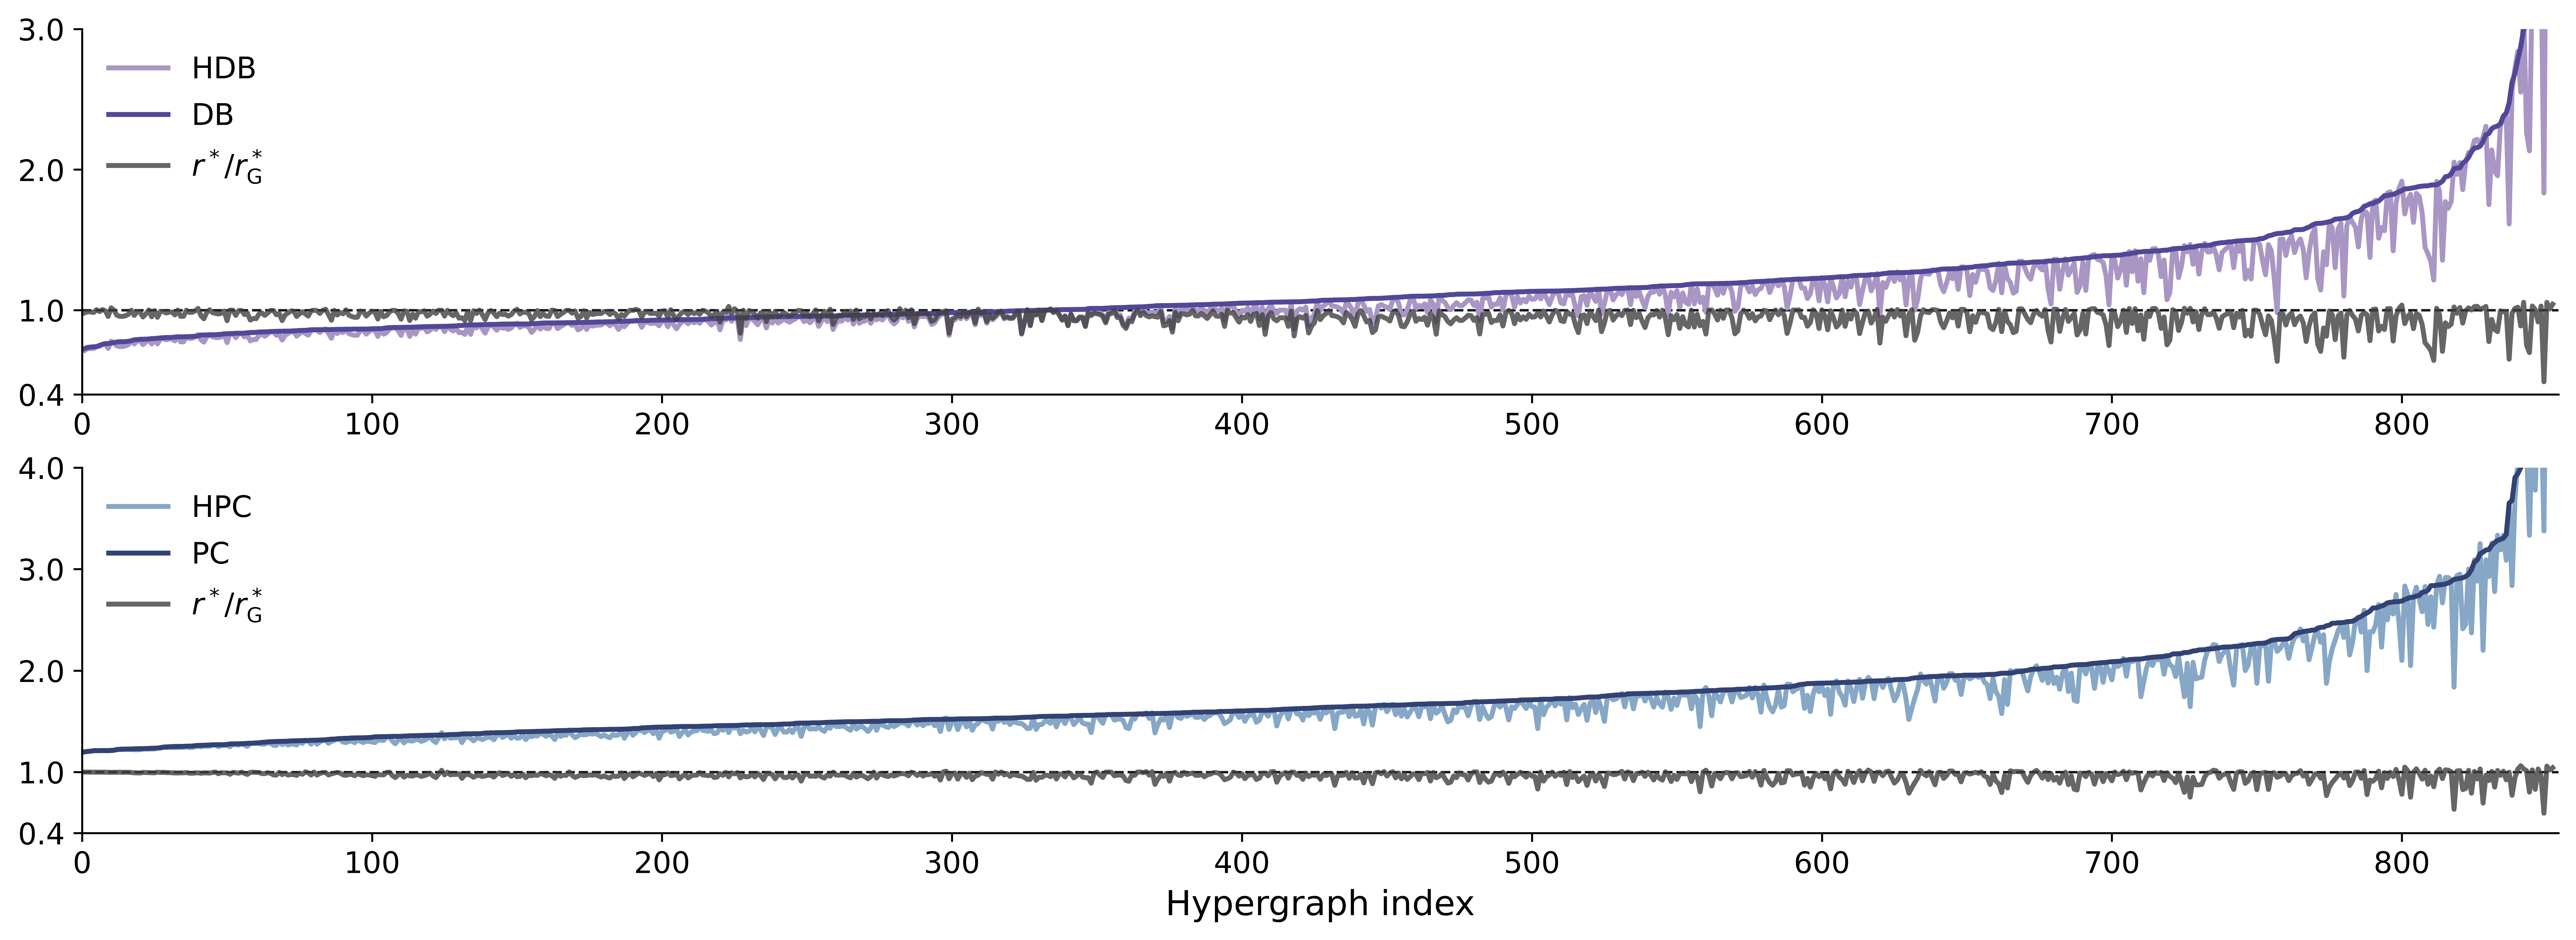

In [13]:
fig = plt.figure(dpi=800, figsize=(18,6))
 
gs = gridspec.GridSpec(2, 1, figure=fig)
ax0 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[1, 0])


# figure of hdb vs db
ax0.axhline(y=1, ls='--', c='#151D29', linewidth =1)

index = [i for i in range(1, 854)]
vs = [a / b for a, b in zip(r_hdb_sorted, r_db_sorted)]

ax0.plot(index, r_hdb_sorted, c='#A996C4', lw=2, label='HDB')
ax0.plot(index, r_db_sorted, c='#514899', lw=2, label='DB')
ax0.plot(index, vs, c='#404040', lw=2, alpha=0.8, label=r'$r^*/ r^*_{\mathrm{G}} $')

ax0.legend(frameon=False, fontsize=12, markerscale= 20,labelspacing=0.6)

ax0.set_xlim(0, 854)
ax0.set_ylim(0.4, 3)
ax0.set_yticks([0.4, 1, 2, 3])

ax0.tick_params(labelsize = 12)


# figure of hpc vs pc
ax2.axhline(y=1, ls='--', c='#151D29', linewidth =1)

index = [i for i in range(1, 854)]
vs = [a / b for a, b in zip(r_hpc_sorted, r_pc_sorted)]

ax2.plot(index, r_hpc_sorted, c='#86A7C6', lw=2, label='HPC')
ax2.plot(index, r_pc_sorted, c='#324274', lw=2, label='PC')
ax2.plot(index, vs, c='#404040', lw=2, alpha=0.8, label=r'$r^*/ r^*_{\mathrm{G}} $')

ax2.legend(frameon=False, fontsize=12, markerscale= 20,labelspacing=0.6)

ax2.set_xlim(0, 854)
ax2.set_ylim(0.5, 4)
ax2.set_yticks([0.4, 1, 2, 3, 4])

ax2.tick_params(labelsize = 12)

ax2.set_xlabel("Hypergraph index",fontsize=14)

mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False

fig.savefig('figure_6e.jpg', bbox_inches = 'tight',dpi=800)

#### The top-6 hypergraphs most conductive to higher-order cooperation under DB-related updates (figure 6e)

/var/folders/6q/mx2zbw5x5kvcqxf56q_s30500000gn/T/ipykernel_80127/1354327991.py:3: RuntimeWarning: invalid value encountered in double_scalars
  hdb_vs_db = [rhg / rg for rhg, rg in zip(r_hdb, r_db)]      # the ratios of higher-order thresholds to pairwise thresholds


{'ratio': 0.49, 'r_hdb': 1.83, 'r_db': 3.74, 'hypergraph index': 848}
{'ratio': 0.64, 'r_hdb': 0.98, 'r_db': 1.54, 'hypergraph index': 756}
{'ratio': 0.64, 'r_hdb': 1.21, 'r_db': 1.89, 'hypergraph index': 810}
{'ratio': 0.65, 'r_hdb': 1.61, 'r_db': 2.48, 'hypergraph index': 836}
{'ratio': 0.67, 'r_hdb': 1.1, 'r_db': 1.65, 'hypergraph index': 779}
{'ratio': 0.7, 'r_hdb': 2.13, 'r_db': 3.06, 'hypergraph index': 843}


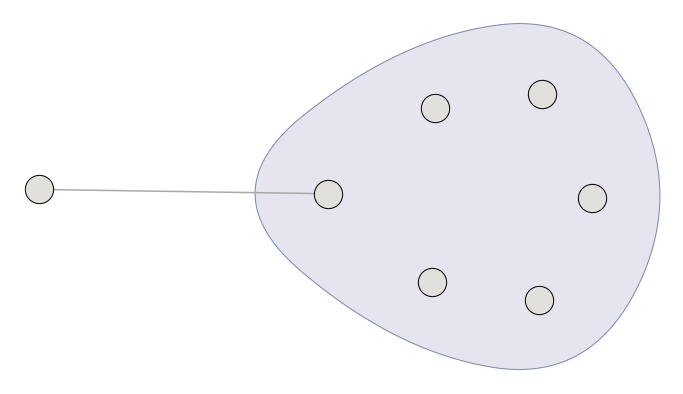

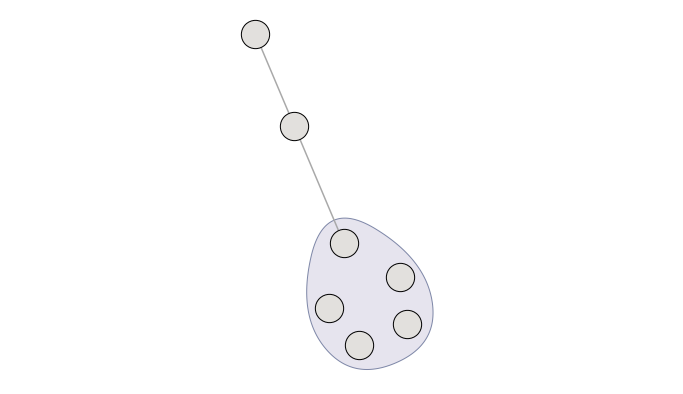

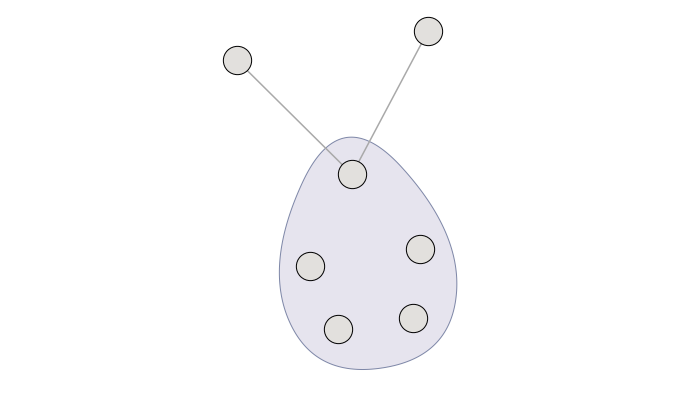

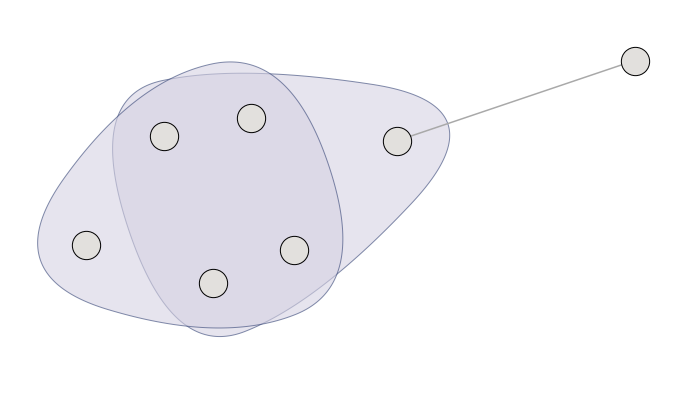

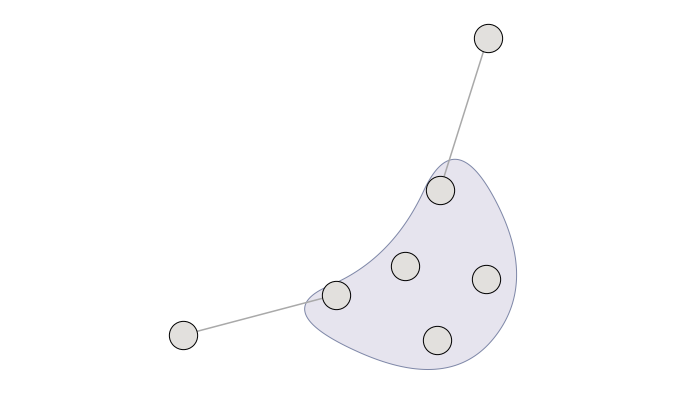

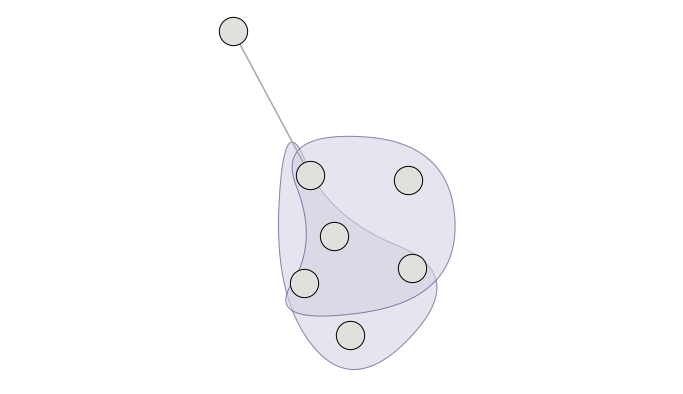

In [29]:
num = 6       # the number of hypergraphs most conductive to higher-order cooperation

hdb_vs_db = [rhg / rg for rhg, rg in zip(r_hdb, r_db)]      # the ratios of higher-order thresholds to pairwise thresholds
min_hdb_vs_db = heapq.nsmallest(num, hdb_vs_db)             # the six minimus ratios of igher-order thresholds to pairwise thresholds
org_idx = list(map(hdb_vs_db.index, min_hdb_vs_db))
min_hdb = [r_hdb[idx] for idx in org_idx]                   # critical values for these hypergraphs and HDB mechanism
min_db = [r_db[idx] for idx in org_idx]                     # critical values for these hypergraphs and DB mechanism
sorted_idx = [r_db_sorted.index(i) for i in min_db]         # sorted hypergraph indexes

## visualization
SIZE_TWO_COLOR = 'darkgrey'
SIZE_THREE_COLOR = '#D6D2E3'
SIZE_FOUR_COLOR = '#D6D2E3'
SIZE_FIVE_COLOR = '#D6D2E3'
SIZE_SIX_COLOR = '#D6D2E3'
SIZE_SEVEN_COLOR = '#D6D2E3'

hye_facecolor = {SIZE_TWO_COLOR: 'darkgrey', SIZE_THREE_COLOR: '#324274', SIZE_FOUR_COLOR: '#324274', 
                 SIZE_FIVE_COLOR: '#324274', SIZE_SIX_COLOR: '#324274', SIZE_SEVEN_COLOR:'#324274'}

hyperedge_color_by_order = {2: SIZE_THREE_COLOR, 3: SIZE_FOUR_COLOR, 4: SIZE_FIVE_COLOR, 5: SIZE_SIX_COLOR, 6: SIZE_SEVEN_COLOR}
hyeperedge_facecolor_by_order = {2: hye_facecolor[SIZE_THREE_COLOR], 3: hye_facecolor[SIZE_FOUR_COLOR], 4: hye_facecolor[SIZE_FIVE_COLOR],
                                 5: hye_facecolor[SIZE_SIX_COLOR], 6: hye_facecolor[SIZE_SEVEN_COLOR]}

for i in range(len(org_idx)):
    draw_hypergraph(H_hypergraph_7[org_idx[i]], hyperedge_alpha=0.6, edge_width=1.5, edge_color=SIZE_TWO_COLOR, hyperedge_color_by_order=hyperedge_color_by_order, 
        hyperedge_facecolor_by_order=hyeperedge_facecolor_by_order, node_size=800,
        node_color='#E2E0DD', node_facecolor='black', node_shape='o', with_node_labels=False)
    
    info_dict = {}
    info_dict['ratio'] = round(min_hdb_vs_db[i], 2)
    info_dict['r_hdb'] = round(min_hdb[i], 2)
    info_dict['r_db'] = round(min_db[i], 2)
    info_dict['hypergraph index'] = round(sorted_idx[i], 2)
    print(info_dict)

    plt.savefig(f'figure_6e_db{sorted_idx[i]}.jpg', bbox_inches = 'tight',dpi=800)

#### The top-6 hypergraphs most conductive to higher-order cooperation under PC-related updates (figure 6e)

/var/folders/6q/mx2zbw5x5kvcqxf56q_s30500000gn/T/ipykernel_80127/1625152016.py:3: RuntimeWarning: invalid value encountered in double_scalars
  hpc_vs_pc = [rhg / rg for rhg, rg in zip(r_hpc, r_pc)]      # the ratios of higher-order thresholds to pairwise thresholds


{'ratio': 0.6, 'r_hdb': 3.38, 'r_db': 5.67, 'hypergraph index': 848}
{'ratio': 0.63, 'r_hdb': 1.84, 'r_db': 2.9, 'hypergraph index': 817}
{'ratio': 0.69, 'r_hdb': 2.2, 'r_db': 3.17, 'hypergraph index': 827}
{'ratio': 0.75, 'r_hdb': 2.05, 'r_db': 2.72, 'hypergraph index': 802}
{'ratio': 0.75, 'r_hdb': 1.65, 'r_db': 2.18, 'hypergraph index': 726}
{'ratio': 0.77, 'r_hdb': 1.88, 'r_db': 2.44, 'hypergraph index': 773}


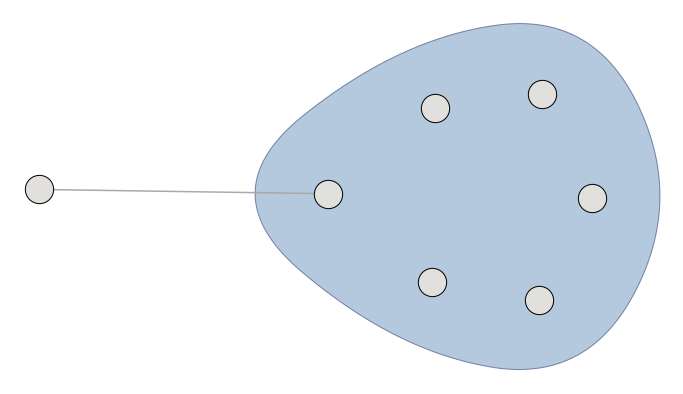

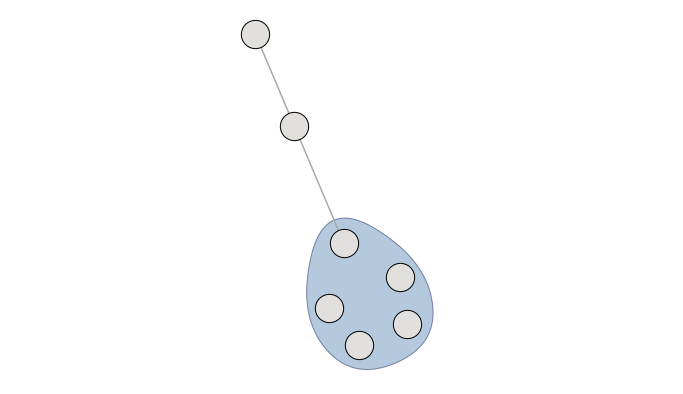

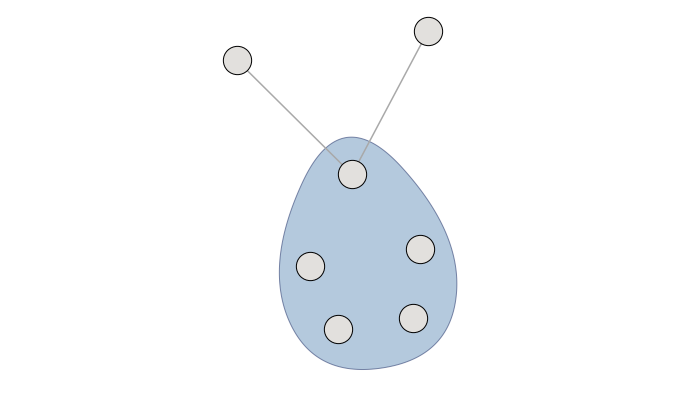

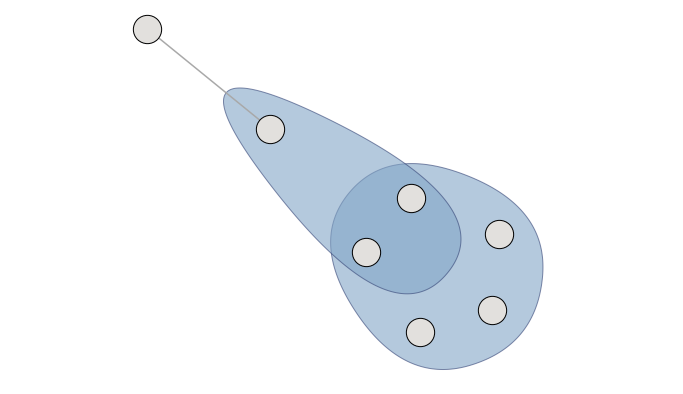

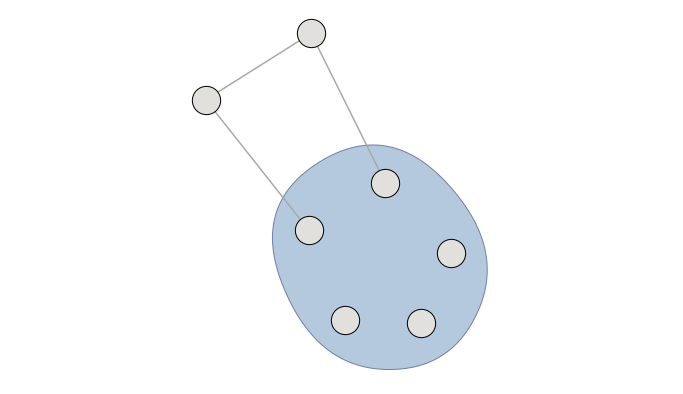

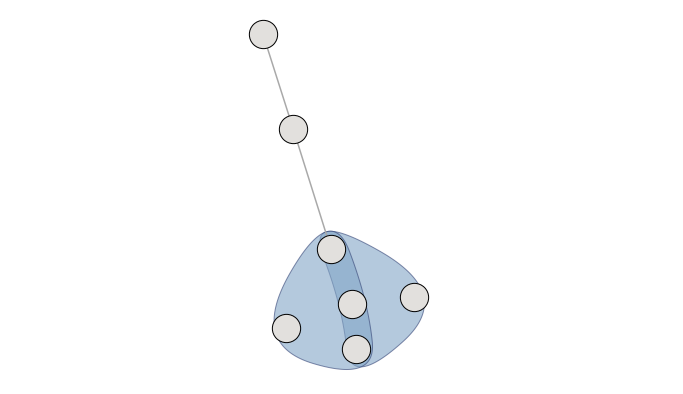

In [31]:
num = 6       # the number of hypergraphs most conductive to higher-order cooperation

hpc_vs_pc = [rhg / rg for rhg, rg in zip(r_hpc, r_pc)]      # the ratios of higher-order thresholds to pairwise thresholds
min_hpc_vs_pc = heapq.nsmallest(num, hpc_vs_pc)             # the six minimus ratios of igher-order thresholds to pairwise thresholds
org_idx = list(map(hpc_vs_pc.index, min_hpc_vs_pc))
min_hpc = [r_hpc[idx] for idx in org_idx]                   # critical values for these hypergraphs and HDB mechanism
min_pc = [r_pc[idx] for idx in org_idx]                     # critical values for these hypergraphs and DB mechanism
sorted_idx = [r_pc_sorted.index(i) for i in min_pc]         # sorted hypergraph indexes

## visualization
SIZE_TWO_COLOR = 'darkgrey'
SIZE_THREE_COLOR = '#83A6C7'
SIZE_FOUR_COLOR = '#83A6C7'
SIZE_FIVE_COLOR = '#83A6C7'
SIZE_SIX_COLOR = '#83A6C7'
SIZE_SEVEN_COLOR = '#83A6C7'

hye_facecolor = {SIZE_TWO_COLOR: 'darkgrey', SIZE_THREE_COLOR: '#314174', SIZE_FOUR_COLOR: '#314174', 
                 SIZE_FIVE_COLOR: '#314174', SIZE_SIX_COLOR: '#314174', SIZE_SEVEN_COLOR: '#314174'}

hyperedge_color_by_order = {2: SIZE_THREE_COLOR, 3: SIZE_FOUR_COLOR, 4: SIZE_FIVE_COLOR, 5: SIZE_SIX_COLOR, 6: SIZE_SEVEN_COLOR}
hyeperedge_facecolor_by_order = {2: hye_facecolor[SIZE_THREE_COLOR], 3: hye_facecolor[SIZE_FOUR_COLOR], 4: hye_facecolor[SIZE_FIVE_COLOR],
                                 5: hye_facecolor[SIZE_SIX_COLOR], 6: hye_facecolor[SIZE_SEVEN_COLOR]}

for i in range(len(org_idx)):
    draw_hypergraph(H_hypergraph_7[org_idx[i]], hyperedge_alpha=0.6, edge_width=1.5, edge_color=SIZE_TWO_COLOR, hyperedge_color_by_order=hyperedge_color_by_order, 
        hyperedge_facecolor_by_order=hyeperedge_facecolor_by_order, node_size=800,
        node_color='#E2E0DD', node_facecolor='black', node_shape='o', with_node_labels=False)
    
    info_dict = {}
    info_dict['ratio'] = round(min_hpc_vs_pc[i], 2)
    info_dict['r_hdb'] = round(min_hpc[i], 2)
    info_dict['r_db'] = round(min_pc[i], 2)
    info_dict['hypergraph index'] = round(sorted_idx[i], 2)
    print(info_dict)

    plt.savefig(f'figure_6e_pc{sorted_idx[i]}.jpg', bbox_inches = 'tight',dpi=800)